In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import shapiro
import numpy as np
from scipy import stats
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

In [11]:
# Load the dataset from the CSV file
dataframe = pd.read_csv('/Users/astrid/PycharmProjects/perch-2/scripts/perch_embeddings_april_10.csv')
# dataframe = pd.read_csv('/Users/astrid/PycharmProjects/audioset-thesis-work/audioset/Perch/embeddings/augmented_dataset_13.csv')

In [12]:
dataframe.drop('cat_id', axis=1, inplace=True)
dataframe.drop('gender', axis=1, inplace=True)

# dataframe.drop('cat_id', axis=1, inplace=True)
# dataframe.drop('gender', axis=1, inplace=True)

In [34]:
dataframe

,0,1,2,3,4,5,6,7,8,9,...,1272,1273,1274,1275,1276,1277,1278,1279,mean_freq,target
0,0.141884,0.073011,-0.025555,-0.041630,0.018381,-0.118694,0.020945,-0.143815,0.329482,-0.047017,...,-0.114967,0.048417,0.023753,0.170430,0.102380,0.052615,0.332595,0.136257,679.55,2.0
1,-0.079333,-0.091065,0.118054,0.094146,0.199633,-0.154579,-0.014646,-0.110822,0.085946,0.044141,...,0.025178,0.010420,-0.012227,-0.019432,-0.037151,-0.001587,0.048088,0.126238,469.14,5.0
2,-0.024783,-0.041338,-0.009037,0.027788,-0.121574,0.008262,-0.044103,-0.018291,0.029554,0.016431,...,-0.163075,-0.030587,-0.007906,-0.030118,0.315515,0.065442,0.196325,0.048757,1218.97,0.0
3,-0.020820,0.002906,-0.033554,-0.021125,0.118649,-0.148657,-0.054513,0.133700,0.080396,-0.040405,...,-0.171903,-0.040649,0.058942,0.004698,0.177685,0.029087,-0.062599,-0.021292,1237.65,0.0
4,-0.086680,-0.042869,-0.012955,0.003681,0.017673,0.017458,0.129110,0.039133,0.277400,0.004522,...,-0.085972,-0.061465,0.020539,0.036171,0.089208,-0.003192,0.340559,0.181918,622.03,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,-0.067801,-0.090516,0.069524,0.002218,-0.029603,-0.034645,0.012869,-0.104015,0.036869,-0.035263,...,0.053332,-0.099996,-0.019161,-0.043154,0.183705,0.049681,-0.006646,-0.011073,549.62,6.0
789,-0.063658,-0.028521,0.035292,-0.012775,-0.097264,-0.138032,0.000296,-0.159721,-0.086892,0.038141,...,-0.053828,-0.061158,0.031086,0.157420,0.025727,0.052929,0.238725,0.190311,514.86,4.0
790,-0.087862,-0.097363,0.005394,-0.030661,-0.043107,0.172747,0.015060,0.172847,0.002494,-0.024708,...,-0.076411,-0.090058,-0.012196,0.008829,0.191439,0.132066,0.154479,0.107542,416.78,10.0
791,0.038296,0.020806,-0.006177,0.056487,0.032785,-0.097973,-0.047449,0.109342,0.061836,-0.004712,...,0.026970,-0.049286,-0.001678,0.011827,0.054219,0.019730,0.131598,0.024892,345.11,18.0


In [13]:
# Identify non-numeric columns
non_numeric_columns = dataframe.select_dtypes(exclude=[np.number]).columns

In [14]:
non_numeric_columns

Index([], dtype='object')

In [15]:
# Check for missing values in the DataFrame
missing_data = dataframe.isnull().sum()
missing_data = missing_data[missing_data > 0]  # Filter out columns where there are no missing values

# Print columns with missing values and the count of missing data
print("Columns with missing values:")
print(missing_data)

Columns with missing values:
Series([], dtype: int64)


In [16]:
def plot_feature_distribution(df, feature_name):
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature_name], kde=True, color='blue')
    plt.title(f'Histogram of {feature_name}')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature_name], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {feature_name}')
    
    plt.tight_layout()
    plt.show()

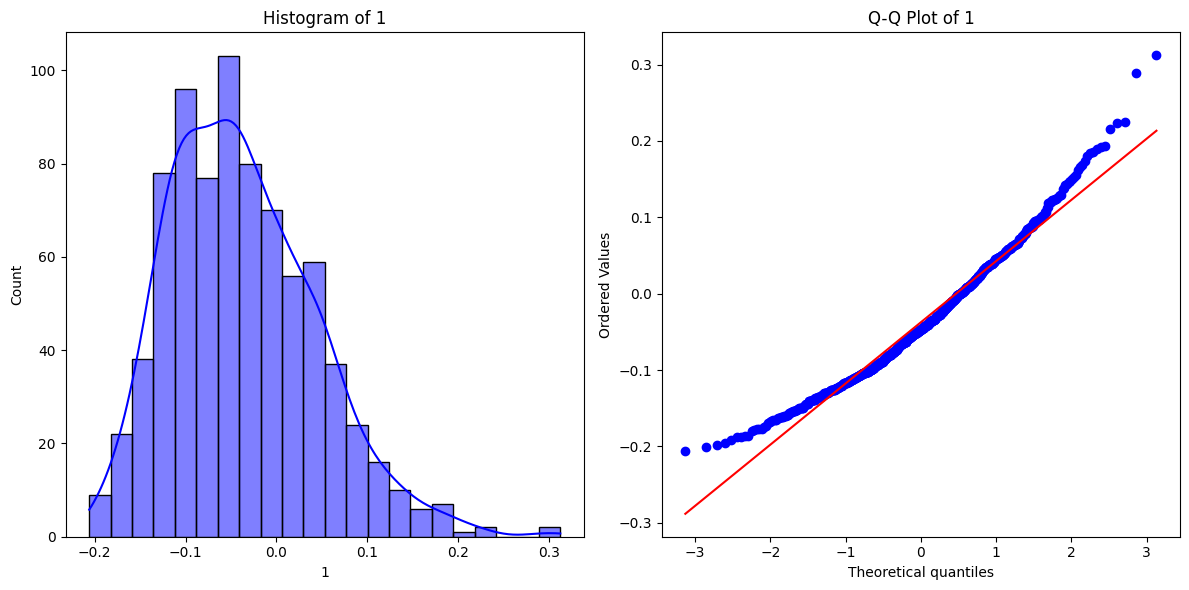

In [31]:
# Example usage for one feature
plot_feature_distribution(dataframe, '1')

In [18]:
def test_normality(df):
    results = pd.DataFrame(columns=['Feature', 'Statistics', 'p-value', 'Normal'])
    for feature in df.columns:
        # Shapiro-Wilk can be ineffective with large samples, so limit the sample size
        data_sample = df[feature].sample(min(5000, len(df)), random_state=1)  # Random sampling for large data
        stat, p_value = shapiro(data_sample)
        results = results.append({
            'Feature': feature,
            'Statistics': stat,
            'p-value': p_value,
            'Normal': 'Yes' if p_value > 0.05 else 'No'
        }, ignore_index=True)
    return results

In [19]:
# Apply the function to only numeric columns
normality_test_results = test_normality(dataframe)
print(normality_test_results)


/var/folders/rh/n5q9_hkd2hx420s0lpvtx7z00000gn/T/ipykernel_31855/1788697196.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/var/folders/rh/n5q9_hkd2hx420s0lpvtx7z00000gn/T/ipykernel_31855/1788697196.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/var/folders/rh/n5q9_hkd2hx420s0lpvtx7z00000gn/T/ipykernel_31855/1788697196.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/var/folders/rh/n5q9_hkd2hx420s0lpvtx7z00000gn/T/ipykernel_31855/1788697196.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/var/folders/rh/n5q9_hkd

        Feature  Statistics       p-value Normal
0             0    0.809558  1.504579e-29     No
1             1    0.973401  7.829482e-11     No
2             2    0.886029  1.055812e-23     No
3             3    0.790187  9.948942e-31     No
4             4    0.969451  8.004684e-12     No
...         ...         ...           ...    ...
1277       1277    0.911062  4.010662e-21     No
1278       1278    0.996070  4.376585e-02     No
1279       1279    0.967681  3.065550e-12     No
1280  mean_freq    0.862976  1.010382e-25     No
1281     target    0.913423  7.472132e-21     No

[1282 rows x 4 columns]


/var/folders/rh/n5q9_hkd2hx420s0lpvtx7z00000gn/T/ipykernel_31855/1788697196.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/var/folders/rh/n5q9_hkd2hx420s0lpvtx7z00000gn/T/ipykernel_31855/1788697196.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/var/folders/rh/n5q9_hkd2hx420s0lpvtx7z00000gn/T/ipykernel_31855/1788697196.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/var/folders/rh/n5q9_hkd2hx420s0lpvtx7z00000gn/T/ipykernel_31855/1788697196.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/var/folders/rh/n5q9_hkd

In [20]:
# Apply Kolmogorov-Smirnov test to each column and collect the results
ks_results = pd.DataFrame(columns=['Feature', 'KS Statistic', 'P-Value'])

for column in dataframe.columns:
    ks_statistic, p_value = stats.kstest(dataframe[column], 'norm', args=(dataframe[column].mean(), dataframe[column].std()))
    ks_results = ks_results.append({'Feature': column, 'KS Statistic': ks_statistic, 'P-Value': p_value}, ignore_index=True)

# Now 'ks_results' will have the KS statistic and p-value for each feature in your DataFrame
print(ks_results)

/var/folders/rh/n5q9_hkd2hx420s0lpvtx7z00000gn/T/ipykernel_31855/4168408868.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ks_results = ks_results.append({'Feature': column, 'KS Statistic': ks_statistic, 'P-Value': p_value}, ignore_index=True)
/var/folders/rh/n5q9_hkd2hx420s0lpvtx7z00000gn/T/ipykernel_31855/4168408868.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ks_results = ks_results.append({'Feature': column, 'KS Statistic': ks_statistic, 'P-Value': p_value}, ignore_index=True)
/var/folders/rh/n5q9_hkd2hx420s0lpvtx7z00000gn/T/ipykernel_31855/4168408868.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ks_results = ks_results.append({'Feature': column, 'KS Statistic': ks_statistic, 'P-Value': p_value}, ignor

        Feature  KS Statistic       P-Value
0             0      0.146490  2.572143e-15
1             1      0.054731  1.663896e-02
2             2      0.121565  1.137397e-10
3             3      0.152885  1.193260e-16
4             4      0.055931  1.346482e-02
...         ...           ...           ...
1277       1277      0.097562  5.063217e-07
1278       1278      0.028183  5.449748e-01
1279       1279      0.052371  2.489425e-02
1280  mean_freq      0.131461  2.071782e-12
1281     target      0.114629  1.559713e-09

[1282 rows x 3 columns]


/var/folders/rh/n5q9_hkd2hx420s0lpvtx7z00000gn/T/ipykernel_31855/4168408868.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ks_results = ks_results.append({'Feature': column, 'KS Statistic': ks_statistic, 'P-Value': p_value}, ignore_index=True)
/var/folders/rh/n5q9_hkd2hx420s0lpvtx7z00000gn/T/ipykernel_31855/4168408868.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ks_results = ks_results.append({'Feature': column, 'KS Statistic': ks_statistic, 'P-Value': p_value}, ignore_index=True)
/var/folders/rh/n5q9_hkd2hx420s0lpvtx7z00000gn/T/ipykernel_31855/4168408868.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ks_results = ks_results.append({'Feature': column, 'KS Statistic': ks_statistic, 'P-Value': p_value}, ignor

# Transformed

In [36]:
# Select the columns you want to transform (all but the last two)
columns_to_transform = dataframe.columns[:-2]

# Initialize the QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', n_quantiles=500, random_state=0)

# Apply the QuantileTransformer only to the selected columns
dataframe_transformed = pd.DataFrame(qt.fit_transform(dataframe[columns_to_transform]), columns=columns_to_transform)

# Concatenate the transformed columns with the last two untransformed columns
dataframe_transformed = pd.concat([dataframe_transformed, dataframe.iloc[:, -2:]], axis=1)

In [38]:
dataframe_transformed

,0,1,2,3,4,5,6,7,8,9,...,1272,1273,1274,1275,1276,1277,1278,1279,mean_freq,target
0,1.482233,1.336704,-0.937160,-2.358251,-0.166211,-1.013069,0.314725,-1.791985,1.275358,-2.051336,...,-1.125558,1.075514,0.172733,1.933203,0.362577,-0.552909,1.860800,1.348205,679.55,2.0
1,-0.898853,-0.552183,1.870056,1.261075,1.391083,-1.710142,-0.352330,-1.107574,0.158901,0.756733,...,0.654784,0.725063,-0.698470,-0.423608,-1.087305,-1.752332,-0.650006,1.254102,469.14,5.0
2,0.171806,0.075377,-0.285611,0.380215,-1.950020,0.511758,-1.463990,0.174550,-0.486518,0.313014,...,-2.052917,0.160069,-0.599959,-0.730006,2.418555,-0.337656,0.660316,-0.054640,1218.97,0.0
3,0.220178,0.563736,-1.334982,-1.152949,0.777486,-1.625039,-2.052654,1.311754,0.094897,-1.667317,...,-2.238650,-0.022278,0.870774,0.178624,1.149864,-0.979461,-1.802121,-1.439206,1237.65,0.0
4,-1.096445,0.047420,-0.410191,-0.236577,-0.174701,0.569595,1.431726,0.710974,1.068535,0.042304,...,-0.646557,-0.410232,0.104618,0.658485,0.225755,-1.800885,1.976603,1.906723,622.03,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,-0.600492,-0.541800,1.273945,-0.287320,-0.701685,0.118186,0.214768,-0.945827,-0.366223,-1.388636,...,0.926982,-1.327562,-0.945803,-1.214688,1.201920,-0.593239,-1.204717,-1.185581,549.62,6.0
789,-0.483064,0.231450,0.777386,-0.876330,-1.577372,-1.375761,-0.017140,-2.290985,-5.199338,0.678905,...,-0.204805,-0.399697,0.365815,1.773768,-0.393966,-0.546534,1.019360,1.976846,514.86,4.0
790,-1.141761,-0.635389,0.178275,-1.570836,-0.872453,1.872069,0.239394,1.492127,-0.880606,-0.974943,...,-0.528571,-1.085034,-0.697406,0.263142,1.288511,0.465876,0.298312,0.985151,416.78,10.0
791,0.839540,0.749544,-0.166122,0.861695,-0.023170,-0.654140,-1.658581,1.145481,-0.072892,-0.221839,...,0.672675,-0.200380,-0.411284,0.314264,-0.089010,-1.134797,0.076851,-0.446628,345.11,18.0


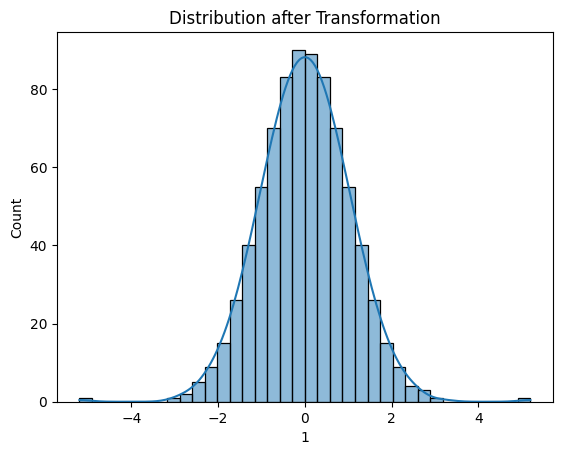

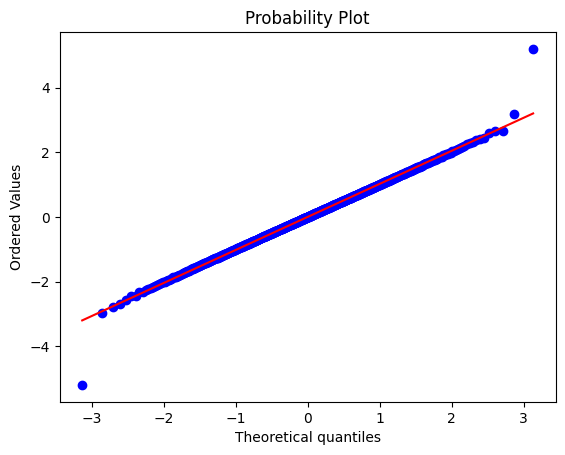

In [37]:
# Example histogram
sns.histplot(dataframe_transformed['1'], kde=True)
plt.title('Distribution after Transformation')
plt.show()

# Q-Q plot
from scipy import stats
stats.probplot(dataframe_transformed['1'], dist="norm", plot=plt)
plt.show()

# Transformed 2

In [39]:
# Select the columns you want to transform (all but the last two)
columns_to_transform = dataframe.columns[:-2]

# Initialize the QuantileTransformer
pt = PowerTransformer(method='yeo-johnson')

# Apply the QuantileTransformer only to the selected columns
dataframe_transformed = pd.DataFrame(pt.fit_transform(dataframe[columns_to_transform]), columns=columns_to_transform)

# Concatenate the transformed columns with the last two untransformed columns
dataframe_transformed = pd.concat([dataframe_transformed, dataframe.iloc[:, -2:]], axis=1)

In [41]:
dataframe_transformed

,0,1,2,3,4,5,6,7,8,9,...,1272,1273,1274,1275,1276,1277,1278,1279,mean_freq,target
0,1.616880,1.327423,-0.878029,-1.991765,-0.165290,-1.048008,0.284213,-1.708980,1.432982,-1.655381,...,-1.130159,1.148153,0.137337,1.967819,0.404102,-0.577635,1.860323,1.334883,679.55,2.0
1,-0.896486,-0.629126,1.959615,1.369533,1.401249,-1.647309,-0.463513,-1.104253,0.055909,0.732287,...,0.681235,0.718697,-0.725215,-0.472347,-1.103871,-1.587018,-0.714767,1.204148,469.14,5.0
2,0.129090,0.067436,-0.344198,0.313909,-1.958858,0.563452,-1.285278,0.185956,-0.557923,0.197504,...,-2.020086,0.122805,-0.613623,-0.744689,2.365802,-0.376086,0.673182,0.007866,1218.97,0.0
3,0.189108,0.606988,-1.165795,-1.120872,0.782931,-1.543439,-1.628998,1.398093,0.002909,-1.410716,...,-2.201366,-0.048527,0.850962,0.064500,1.138540,-0.982172,-1.829821,-1.439157,1237.65,0.0
4,-1.067105,0.047464,-0.463864,-0.297193,-0.172853,0.653724,1.552999,0.746237,1.247613,-0.075604,...,-0.667363,-0.438653,0.066139,0.627147,0.270354,-1.621369,1.927390,1.874232,622.03,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,-0.645580,-0.620884,1.355476,-0.339753,-0.711055,0.098749,0.134521,-0.989912,-0.468006,-1.229874,...,0.934729,-1.303800,-0.909142,-1.108912,1.195157,-0.625552,-1.257036,-1.201313,549.62,6.0
789,-0.560269,0.231199,0.754667,-0.818158,-1.601701,-1.362100,-0.120758,-2.032437,-2.565097,0.627180,...,-0.212360,-0.432518,0.295788,1.886722,-0.398404,-0.572556,1.050911,1.964208,514.86,4.0
790,-1.095387,-0.724618,0.062048,-1.502012,-0.877129,1.806651,0.176188,1.598357,-0.922050,-0.883106,...,-0.525890,-1.061354,-0.724400,0.146528,1.267461,0.493227,0.292405,0.946837,416.78,10.0
791,0.904199,0.805484,-0.259464,0.861325,-0.014199,-0.733436,-1.392450,1.255466,-0.185332,-0.308353,...,0.698254,-0.204379,-0.456786,0.204394,-0.093135,-1.156772,0.080672,-0.439511,345.11,18.0


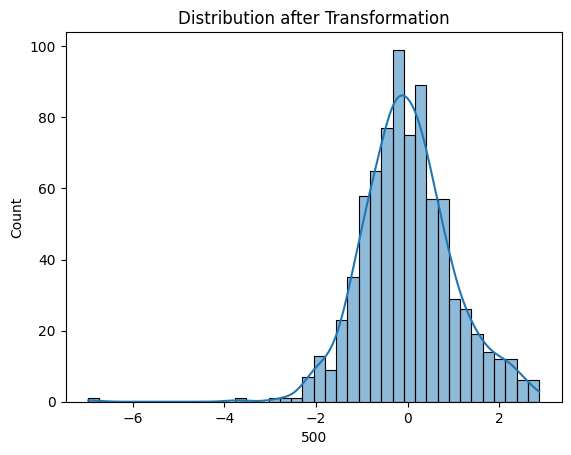

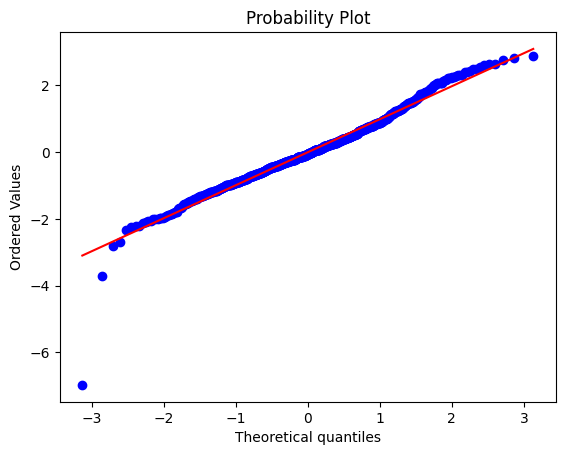

In [40]:
# Example histogram
sns.histplot(dataframe_transformed['500'], kde=True)
plt.title('Distribution after Transformation')
plt.show()

# Q-Q plot
from scipy import stats
stats.probplot(dataframe_transformed['500'], dist="norm", plot=plt)
plt.show()